In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
import chardet
with open("D:/Data Science/Assignments/5 Multi Linear Regression/Toyota-Corolla.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
df = pd.read_csv("D:/Data Science/Assignments/5 Multi Linear Regression/Toyota-Corolla.csv",encoding='ISO-8859-1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.drop(['Mfg_Month', 'Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'
], axis=1,inplace=True)

# Correlation Matrix

In [5]:
df.corr()

,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.117704,-0.130207,-0.043343,-0.240821,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.117704,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.240821,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

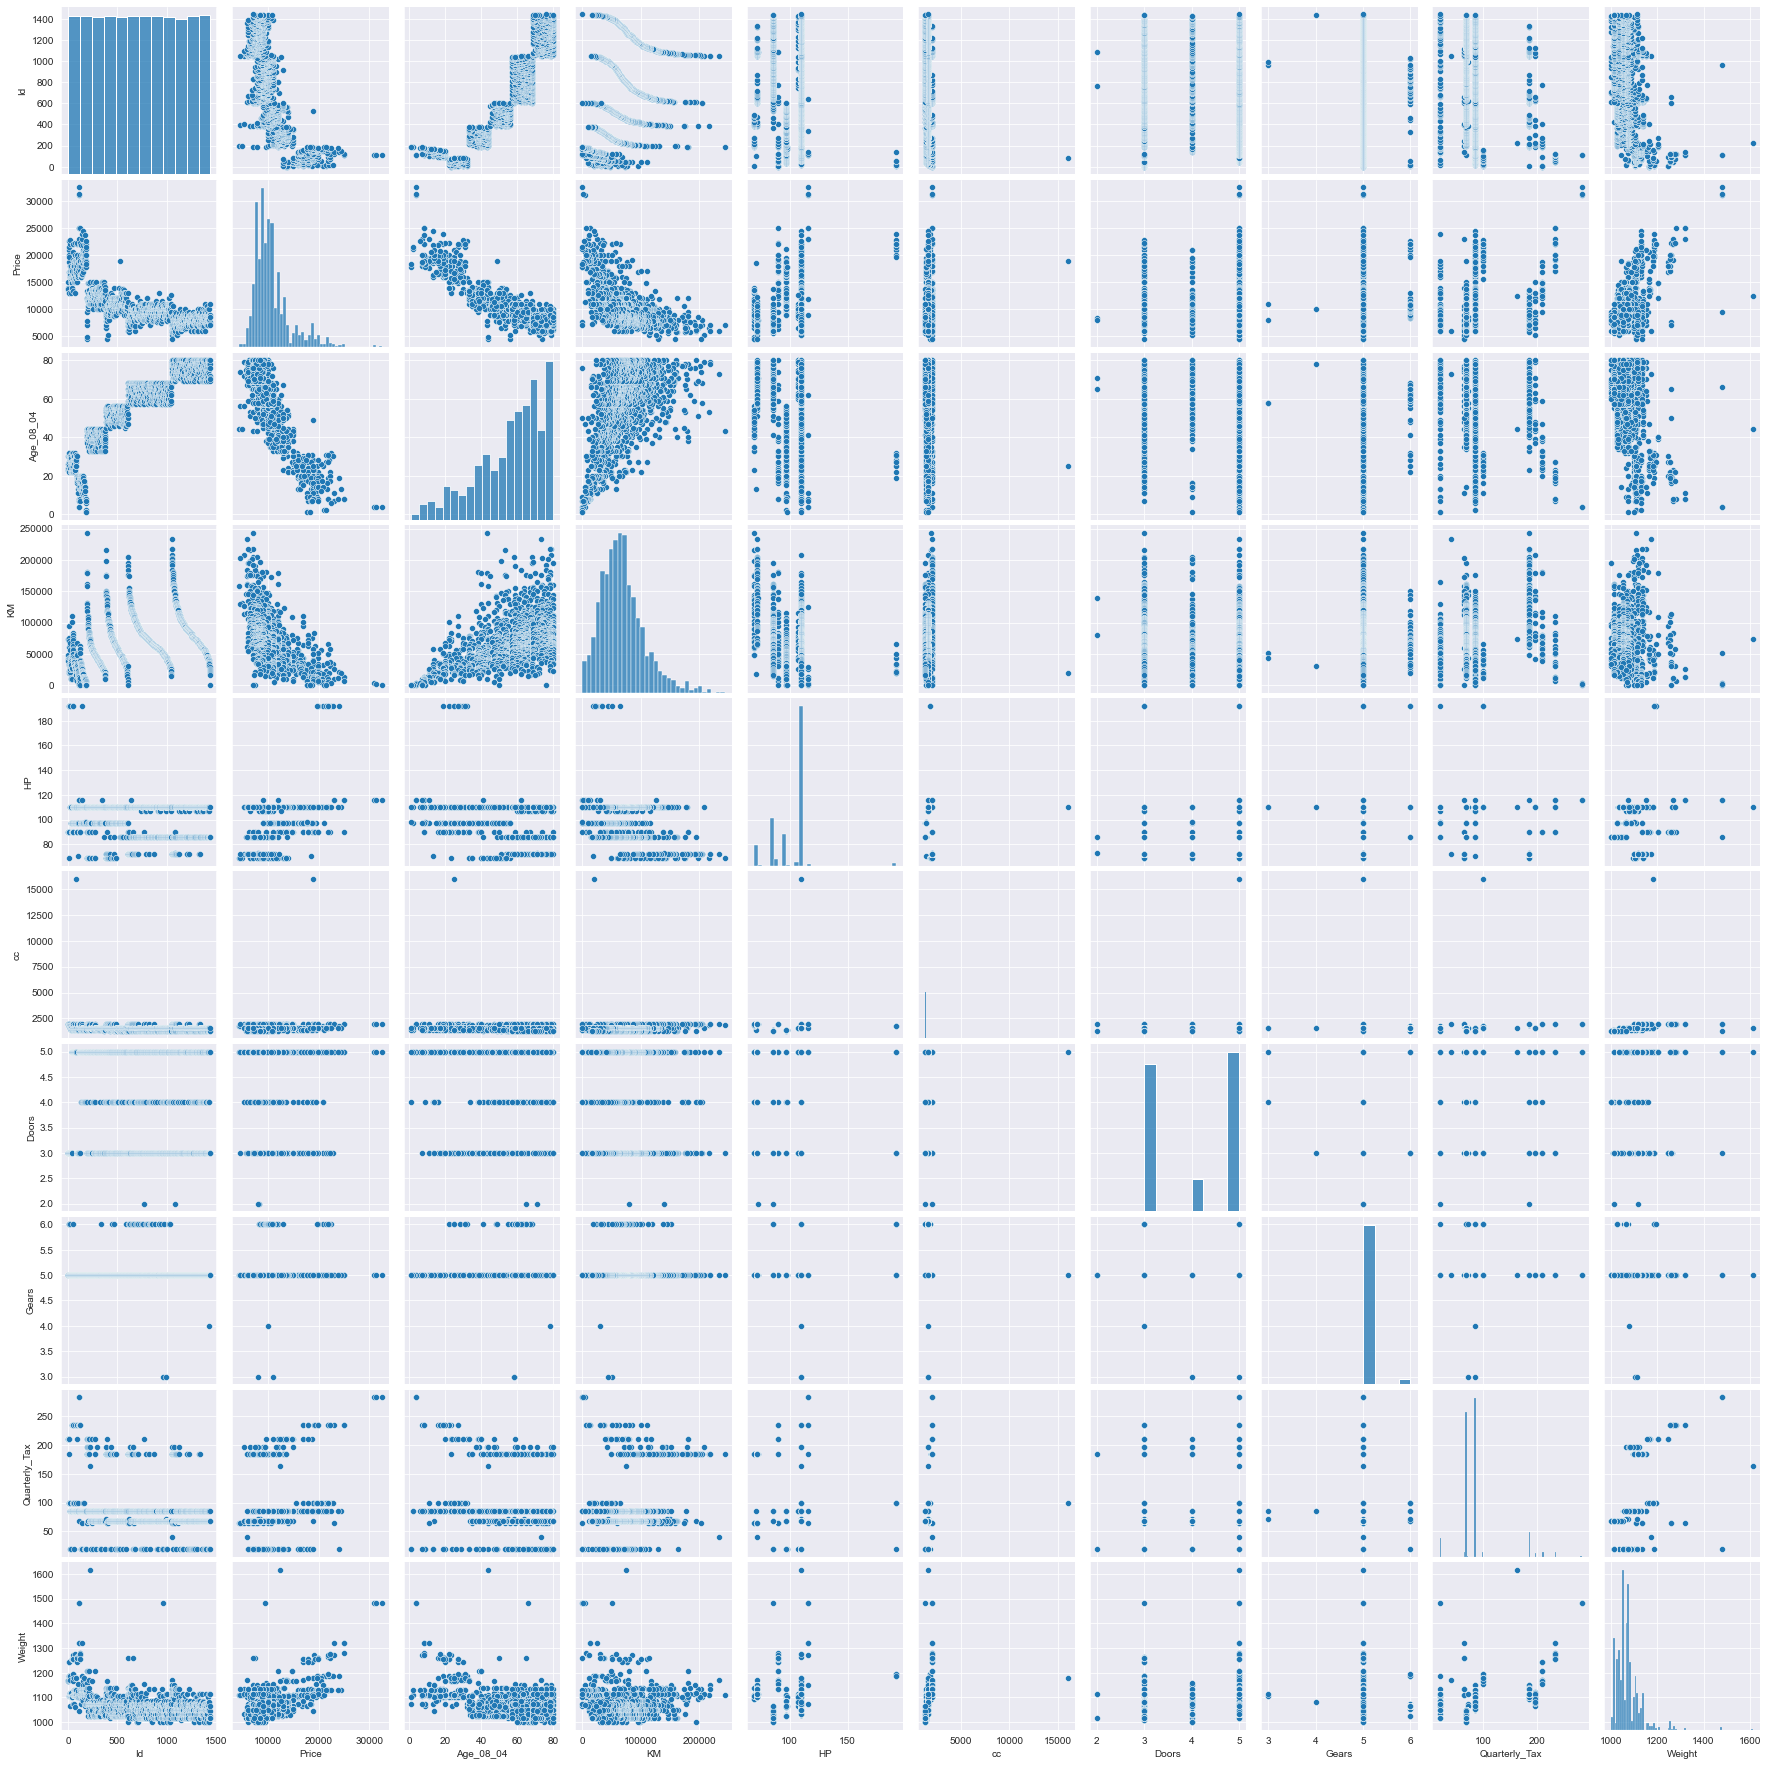

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a model

In [7]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('Price~Age_08_04+KM+HP+Doors+cc+Gears+Weight+Quarterly_Tax',data=df).fit()

In [8]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:28:48   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [9]:
ml_d=smf.ols('Price~Doors',data = df).fit()  
ml_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.46e-12
Time:                        11:28:49   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
ml_c=smf.ols('Price~cc',data = df).fit()  
ml_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.55e-06
Time:                        11:28:49   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
ml_dc=smf.ols('Price~Doors+cc',data = df).fit()  
ml_dc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.15e-15
Time:                        11:28:49   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [12]:
#rsq_hp = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=data).fit().rsquared  
#vif_hp = 1/(1-rsq_hp) # 16.33


rsq_2 = smf.ols('Age_08_04~KM+HP+Doors+cc+Gears+Weight+Quarterly_Tax',data=df).fit().rsquared  
vif_2 = 1/(1-rsq_2) 

rsq_3 = smf.ols('KM~Age_08_04+HP+Doors+cc+Gears+Weight+Quarterly_Tax',data=df).fit().rsquared  
vif_3 = 1/(1-rsq_3) 

rsq_4 = smf.ols('HP~Age_08_04+KM+Doors+cc+Gears+Weight+Quarterly_Tax',data=df).fit().rsquared  
vif_4 = 1/(1-rsq_4) 

rsq_5 = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Weight+Quarterly_Tax',data=df).fit().rsquared  
vif_5 = 1/(1-rsq_5) 

rsq_6 = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Weight+Quarterly_Tax',data=df).fit().rsquared  
vif_6 = 1/(1-rsq_6) 

rsq_7 = smf.ols('Gears~Age_08_04+KM+HP+Doors+cc+Weight+Quarterly_Tax',data=df).fit().rsquared  
vif_7 = 1/(1-rsq_7) 

rsq_8 = smf.ols('Weight~Age_08_04+KM+HP+Doors+cc+Gears+Quarterly_Tax',data=df).fit().rsquared  
vif_8 = 1/(1-rsq_8) 

rsq_9 = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+Doors+cc+Gears+Weight',data=df).fit().rsquared  
vif_9 = 1/(1-rsq_9)

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','Doors','cc','Gears','Weight','Quarterly_Tax'],'VIF':[vif_2,vif_3,vif_4,vif_5,vif_6,vif_7,vif_8,vif_9]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,Doors,1.156575
4,cc,1.163894
5,Gears,1.098723
6,Weight,2.516420
7,Quarterly_Tax,2.311431


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

In [13]:
res=model1.resid
res

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

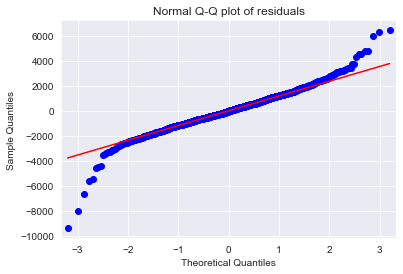

In [14]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [15]:
list(np.where(model1.resid>6000))

[array([147, 523], dtype=int32)]

# Residual Plot for Homoscedasticity

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

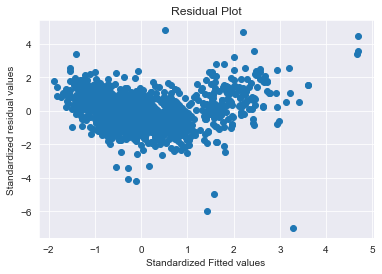

In [17]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

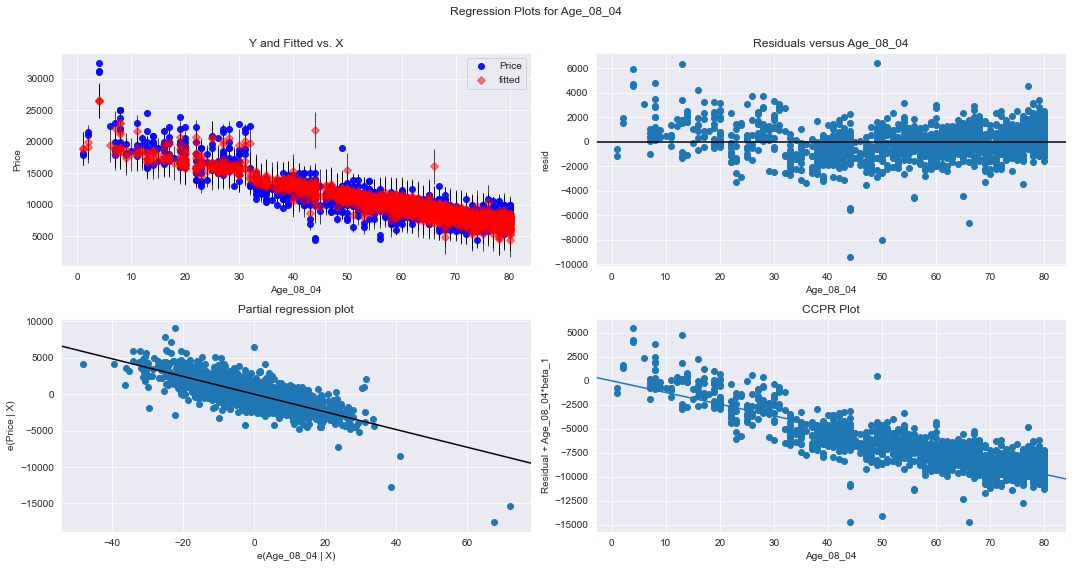

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age_08_04", fig=fig)
plt.show()

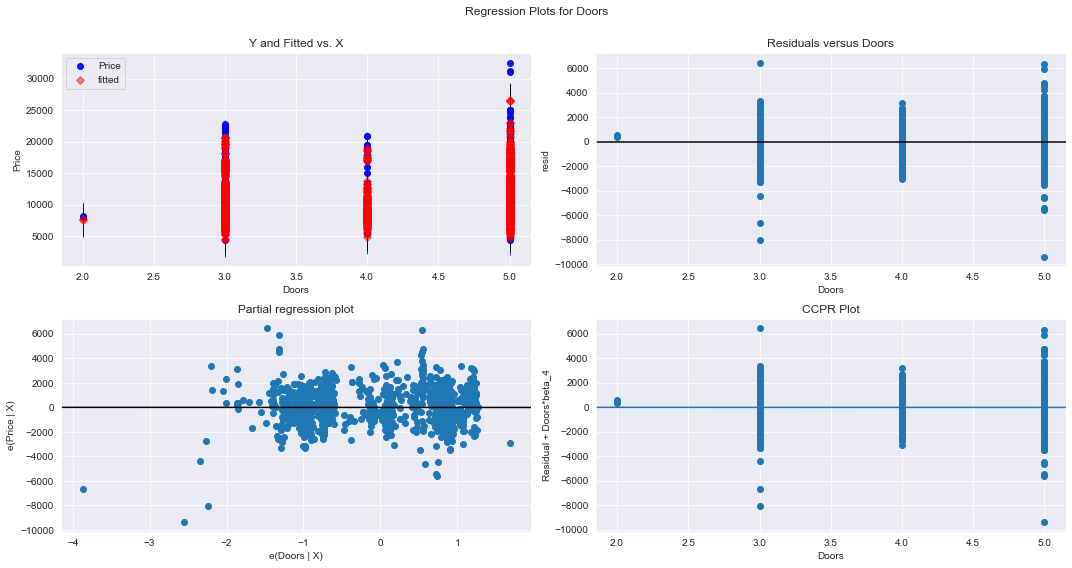

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Doors", fig=fig)
plt.show()

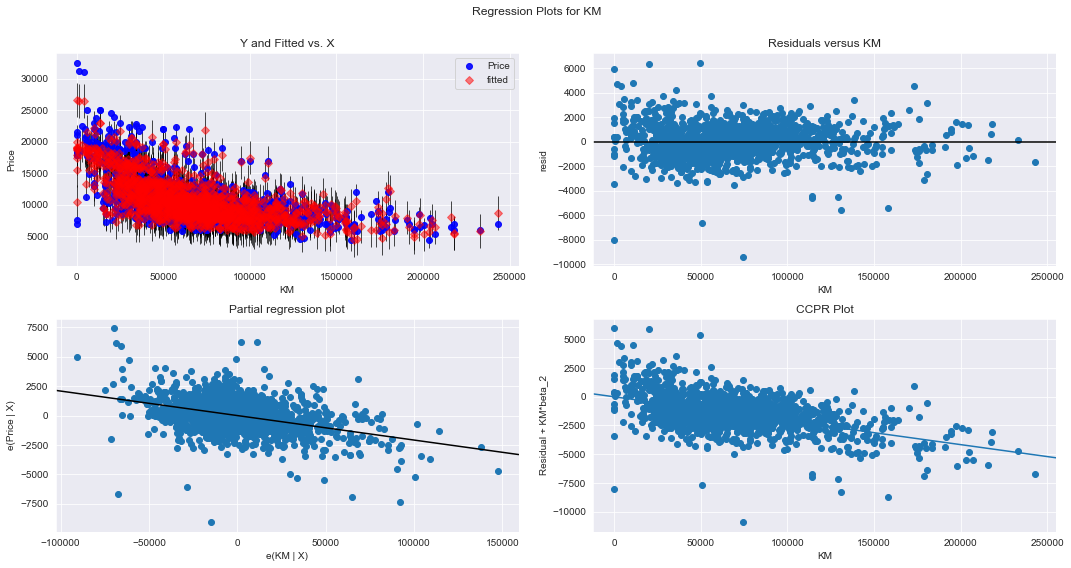

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

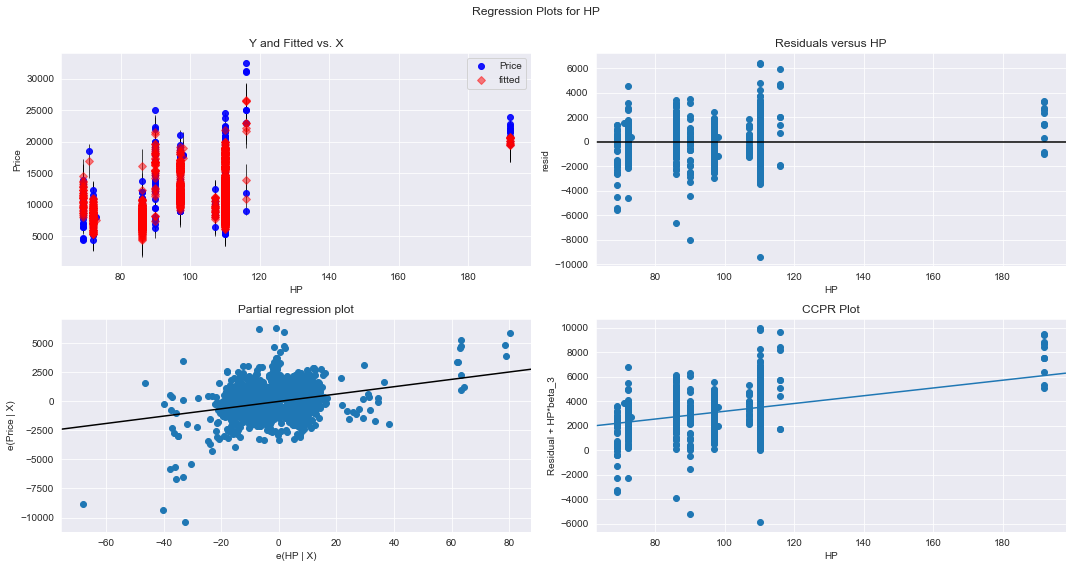

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

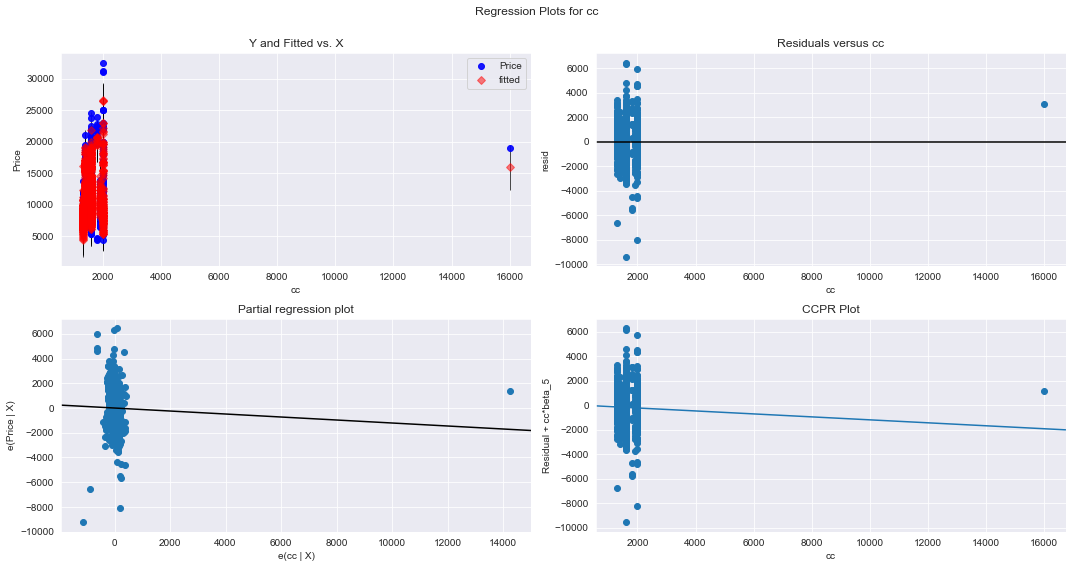

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "cc", fig=fig)
plt.show()

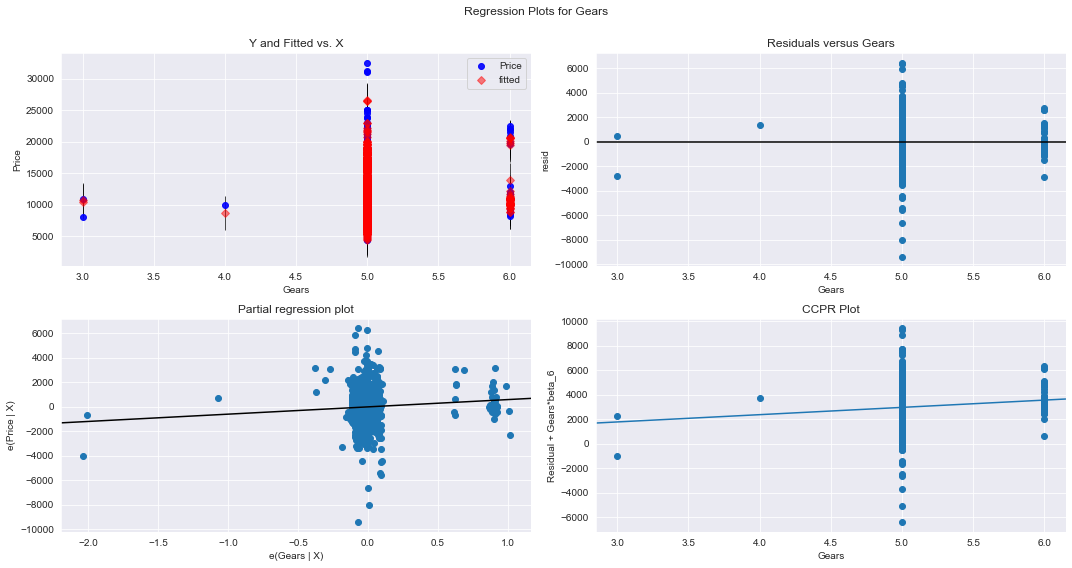

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig)
plt.show()

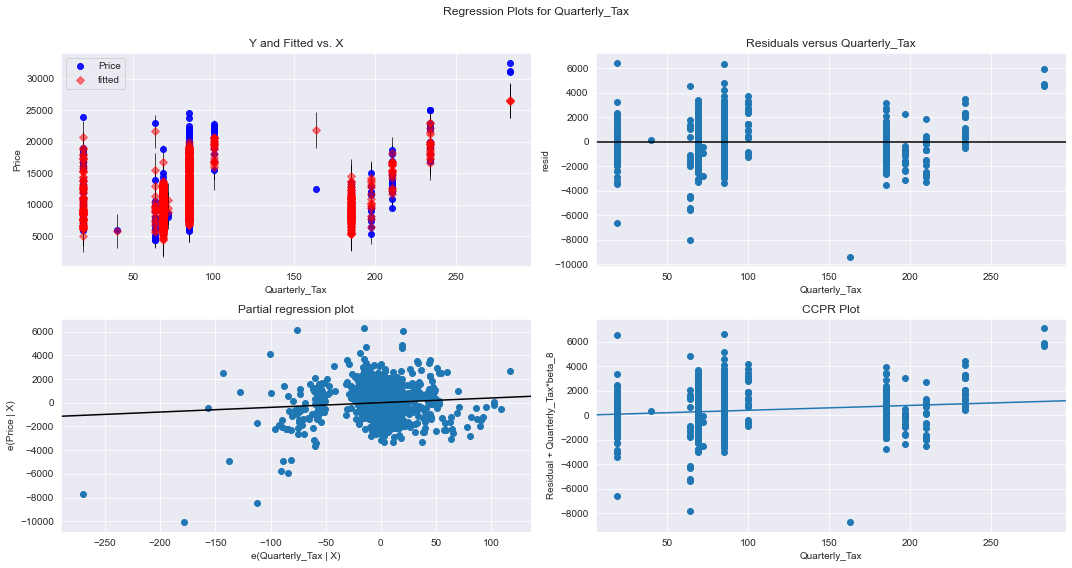

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Quarterly_Tax", fig=fig)
plt.show()

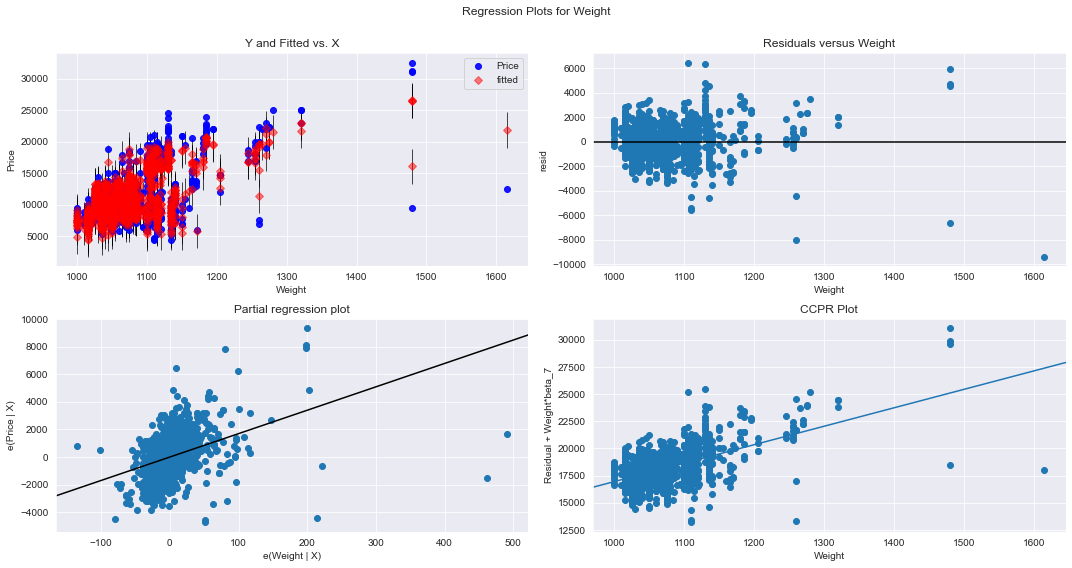

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [26]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

In [27]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

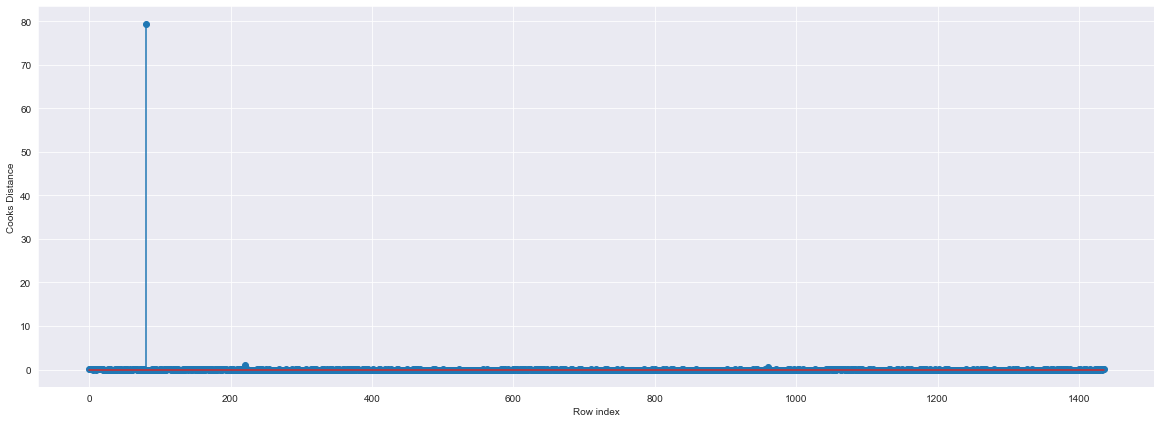

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624133237)

# High Influence points

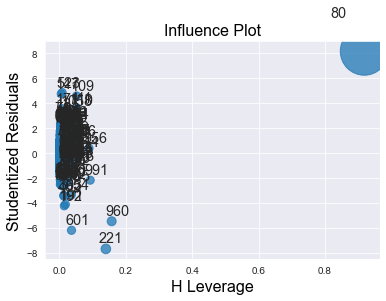

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [31]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [32]:
leverage_cutoff

0.02506963788300836

In [33]:
df[df.Id.isin([80])]

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
79,80,TOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-Doors,14900,30,22000,97,1400,5,5,85,1110


In [34]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


# Improving the model

In [35]:
import chardet
with open("D:/Data Science/Assignments/5 Multi Linear Regression/Toyota-Corolla.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [36]:
#Load the data
df_new = pd.read_csv("D:/Data Science/Assignments/5 Multi Linear Regression/Toyota-Corolla.csv",encoding='ISO-8859-1')

In [37]:
df_new

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [38]:
df_new=df.drop(df.Id[[80]],axis=0).reset_index()

In [39]:
df_new

,index,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [40]:
df1=df_new.drop(['index'],axis=1)

In [41]:
df1

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [42]:
df1

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


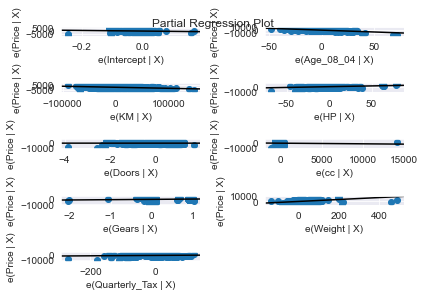

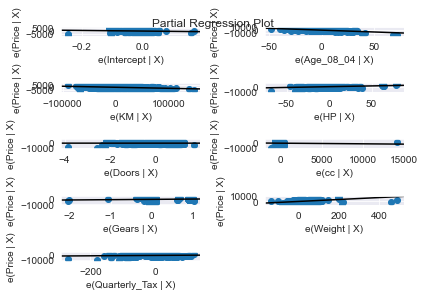

In [43]:
sm.graphics.plot_partregress_grid(model1)

# Building Our Final Model

In [44]:
#Build model
import statsmodels.formula.api as smf 
final_ml_d = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+Quarterly_Tax',data=df1).fit()

In [45]:
(final_ml_d.rsquared,final_ml_d.aic)

(0.8633681230438911, 24751.75414833383)

In [46]:
#Build model
import statsmodels.formula.api as smf 
final_ml_c = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight+Quarterly_Tax',data=df1).fit()

In [47]:
(final_ml_c.rsquared,final_ml_c.aic)

(0.8633679903829434, 24749.75554162778)

# Cook’s Distance

In [48]:
model_influence_d = final_ml_d.get_influence()
(c_d, _) = model_influence_d.cooks_distance

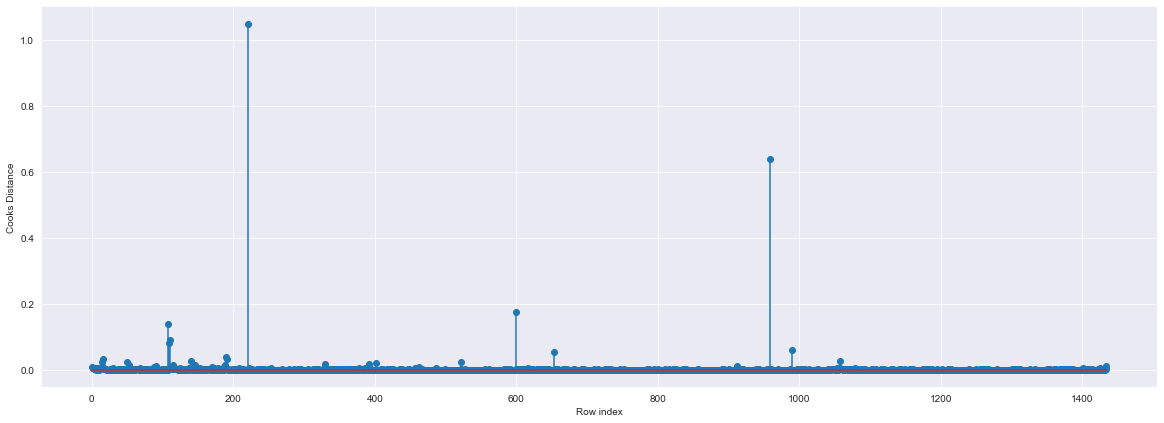

In [49]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c_d, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
np.argwhere(c_d>0.1),np.max(c_d)

(array([[108],
        [220],
        [600],
        [959]], dtype=int32),
 1.0503937016041376)

In [51]:
df2=df1.drop(df1.index[[220,108,600,659]],axis=0).reset_index()

In [52]:
df2

,index,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1426,1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1427,1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1428,1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1429,1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [53]:
df3=df2.drop(['index'],axis=1)

In [54]:
df3

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1426,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1427,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1428,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1429,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [55]:
final_ml_doors = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+Quarterly_Tax',data=df3).fit()

In [56]:
model_influence_doors = final_ml_doors.get_influence()
(c_doors, _) = model_influence_doors.cooks_distance

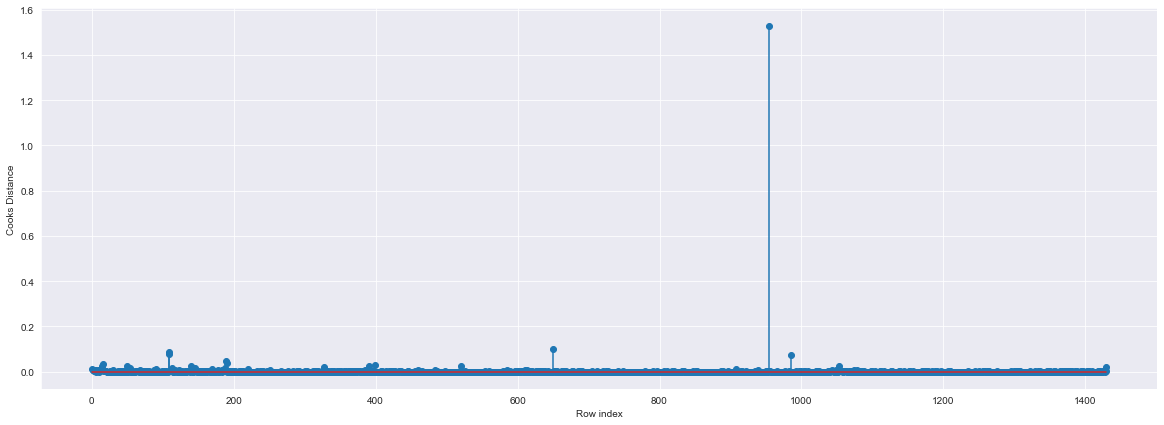

In [57]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c_doors, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
np.argwhere(c_doors>0.05),np.max(c_doors)

(array([[108],
        [109],
        [650],
        [955],
        [986]], dtype=int32),
 1.5300329587195833)

In [59]:
(final_ml_doors.rsquared,final_ml_doors.aic)

(0.8709587947029727, 24566.862450473855)

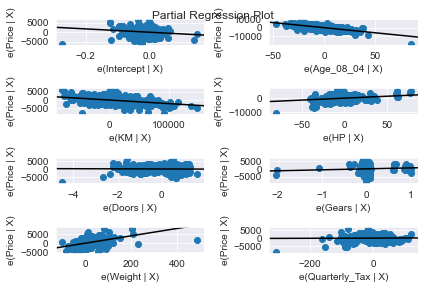

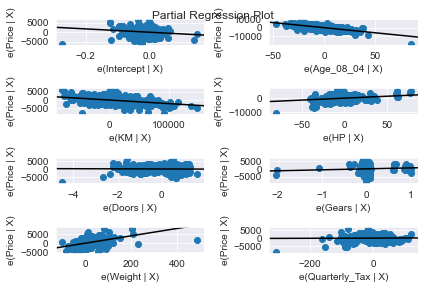

In [60]:
sm.graphics.plot_partregress_grid(final_ml_doors)

In [61]:
df4=df3.drop(df3.index[[108,109,650,955,986]],axis=0).reset_index()

In [62]:
df4

,index,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1426,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1422,1427,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1423,1428,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1424,1429,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [63]:
df4=df4.drop(['index'],axis=1)

In [64]:
df4

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1421,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1422,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1423,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1424,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [65]:
final_ml_doors1 = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+Quarterly_Tax',data=df4).fit()

In [66]:
model_influence_doors1 = final_ml_doors1.get_influence()
(c_doors1, _) = model_influence_doors1.cooks_distance

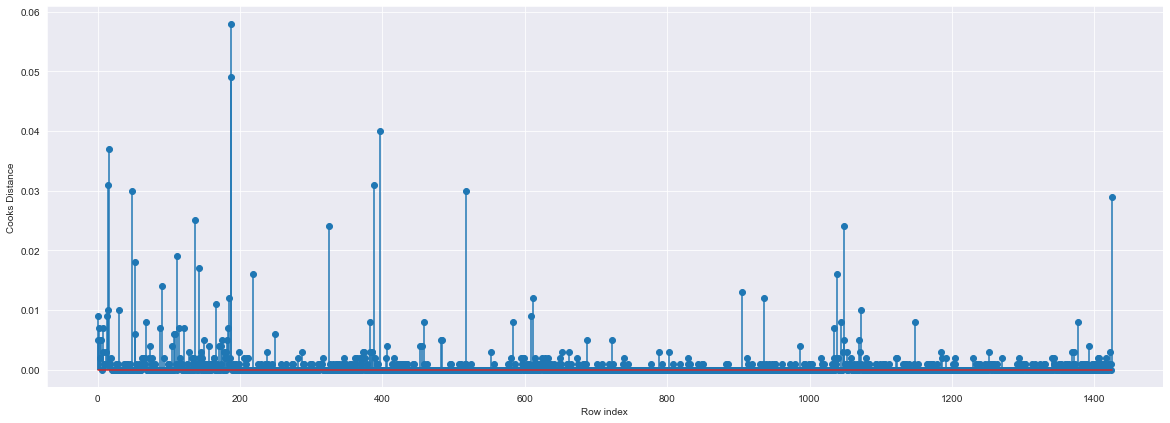

In [67]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c_doors1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
np.argwhere(c_doors1>0.025),np.max(c_doors1)

(array([[  14],
        [  16],
        [  49],
        [ 137],
        [ 187],
        [ 188],
        [ 388],
        [ 397],
        [ 518],
        [1425]], dtype=int32),
 0.057645859800400635)

In [69]:
(final_ml_doors1.rsquared,final_ml_doors1.aic)

(0.8738252734677112, 24385.662924177308)

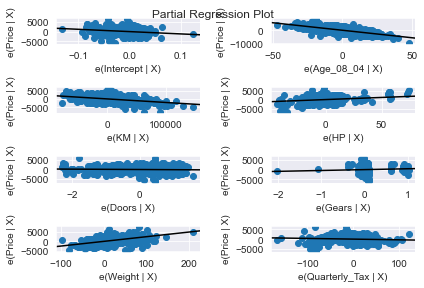

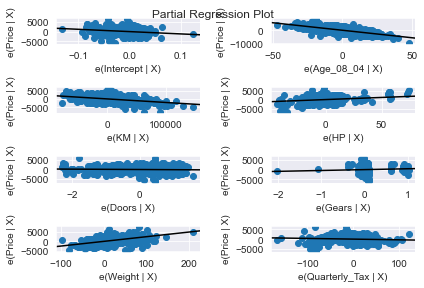

In [70]:
sm.graphics.plot_partregress_grid(final_ml_doors1)

In [71]:
df5=df4.drop(df4.index[[14,16,49,137,187,188,388,397,518,1425]],axis=0).reset_index()

In [72]:
df5

,index,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1420,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8450,80,23000,86,1300,3,5,69,1015
1412,1421,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1413,1422,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1414,1423,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015


In [73]:
df5=df5.drop(['index'],axis=1)

In [74]:
df5

,Id,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1411,1437,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8450,80,23000,86,1300,3,5,69,1015
1412,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1413,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1414,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015


In [75]:
final_ml_doors2 = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight+Quarterly_Tax',data=df5).fit()

In [76]:
model_influence_doors2 = final_ml_doors2.get_influence()
(c_doors2, _) = model_influence_doors2.cooks_distance

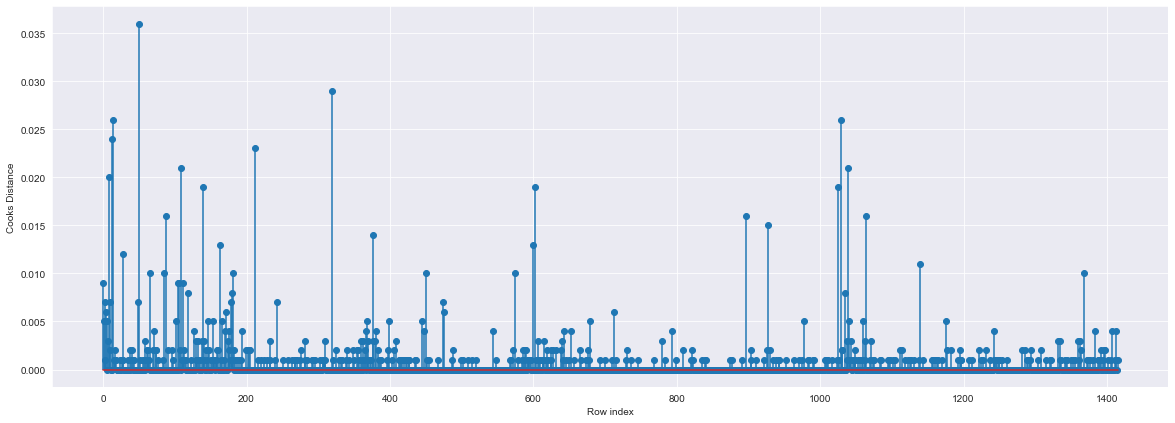

In [77]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df5)), np.round(c_doors2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [78]:
np.argwhere(c_doors2>0.010),np.max(c_doors2)

(array([[   8],
        [  13],
        [  14],
        [  28],
        [  50],
        [  65],
        [  85],
        [  87],
        [ 108],
        [ 139],
        [ 163],
        [ 181],
        [ 212],
        [ 319],
        [ 377],
        [ 450],
        [ 574],
        [ 600],
        [ 602],
        [ 896],
        [ 927],
        [1025],
        [1029],
        [1039],
        [1064],
        [1139]], dtype=int32),
 0.036304429352756726)

In [79]:
(final_ml_doors2.rsquared,final_ml_doors2.aic)

(0.8817897278497445, 24064.765753250846)

# Predicting for new data

In [80]:
#New data for prediction
new_data=pd.DataFrame({"Age_08_04":23,"KM":46986,"HP":90,"Doors":3,"cc":2000,"Gears":5,"Weight":1165,"Quarterly_Tax":210},index=[1])

In [81]:
final_ml_doors2.predict(new_data)

1    16527.976068
dtype: float64

In [82]:
final_ml_doors2.predict(df_new.iloc[0:5,])

0    16527.976068
1    15996.169923
2    16521.257466
3    16162.743630
4    16027.161727
dtype: float64

In [83]:
pred_y = final_ml_doors2.predict(df_new)

In [84]:
pred_y

0       16527.976068
1       15996.169923
2       16521.257466
3       16162.743630
4       16027.161727
            ...     
1430     8948.261356
1431     8377.433527
1432     8532.908663
1433     8649.775545
1434    11391.243694
Length: 1435, dtype: float64